<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/Copy_of_D_Strauss_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To start we will be working primarily with Pandas, Numpy and Re. These three libraries will allow us to perform any necessary text modifications as well as manipulate our dataframes to effectively return all the necessary data.

In [1]:
#Import the regex library
import re
#Import NumPy as np
import numpy as np
#Import Pandas as pd
import pandas as pd


Next, We simply import our TXT file.




In [2]:
#Import our text file
from google.colab import files
uploaded = files.upload()



Saving tournamentinfo.txt to tournamentinfo (24).txt


Read the CSV into a dataframe and save it as Data. Identify the pattern for all the dotted lines between Players so we can remove all such lines from the data frame. Use a boolean test to determine if the pattern applies to any entries.

Note: That our first two rows seem to be the header of our txt file. 

In [3]:
#Read our text file into a dataframe 
Data = pd.read_csv('tournamentinfo.txt', header = None)

#Use a regular expression to isolate and remove all lines and save it  as Lines_Removed
test = Data[0].str.contains('\---+')
Lines_Removed=Data[~test]
Lines_Removed



,0
1,Pair | Player Name |Total...
2,Num | USCF ID / Rtg (Pre->Post) | Pts ...
4,1 | GARY HUA |6.0 ...
5,ON | 15445895 / R: 1794 ->1817 |N:2 ...
7,2 | DAKSHESH DARURI |6.0 ...
...,...
188,MI | 15219542 / R: 1530 ->1535 | ...
190,63 | THOMAS JOSEPH HOSMER |1.0 ...
191,MI | 15057092 / R: 1175 ->1125 | ...
193,64 | BEN LI |1.0 ...


Drop the two rows of the data frame that represent the header they are unnecessary.
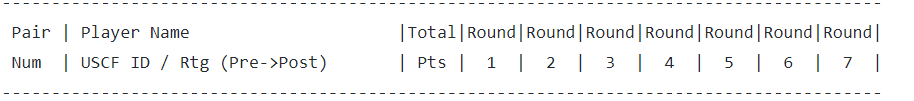

Create a regular expression that will divide the data by |.
Then show the data to see the results.

This yields interesting results. We will have the player number, name, and points on every other line. While state and pre_tournament ratings are filling the gaps and are also on every other line.

In [4]:
# Drop the first 2 rows, the header is unnecessary
Lines_Removed=Lines_Removed.drop([1,2])

# Create a regex to separate the data 
split_d = Lines_Removed[0].str.split("|", expand = True) 

# Show the results
split_d

,0,1,2,3,4,5,6,7,8,9,10
4,1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4,
5,ON,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W,
7,2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7,
8,MI,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B,
10,3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12,
...,...,...,...,...,...,...,...,...,...,...,...
188,MI,15219542 / R: 1530 ->1535,,B,,,,,,,
190,63,THOMAS JOSEPH HOSMER,1.0,L 2,L 48,D 49,L 43,L 45,H,U,
191,MI,15057092 / R: 1175 ->1125,,W,B,W,B,B,,,
193,64,BEN LI,1.0,L 22,D 30,L 31,D 49,L 46,L 42,L 54,


We clearly have to organize our data better. But there is an obvious anomaly here that we need to fix. We have a tenth column with nothing in it. So we will have to drop it from our data frame before proceeding.

In [5]:
#Drop the tenth column
split_d=split_d.drop([10], axis=1)

#Show the results
split_d

,0,1,2,3,4,5,6,7,8,9
4,1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4
5,ON,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W
7,2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7
8,MI,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B
10,3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12
...,...,...,...,...,...,...,...,...,...,...
188,MI,15219542 / R: 1530 ->1535,,B,,,,,,
190,63,THOMAS JOSEPH HOSMER,1.0,L 2,L 48,D 49,L 43,L 45,H,U
191,MI,15057092 / R: 1175 ->1125,,W,B,W,B,B,,
193,64,BEN LI,1.0,L 22,D 30,L 31,D 49,L 46,L 42,L 54


Much better the tenth column is gone. Now we can proceed to clean up our dataframe. We will do this by separating our data into two separate dataframes. The rows containing the player index, name, and points will be saved in a dataframe called frame_1 the States and pre_tournament rating will be saved in frame_2. We do this by using a regular expression to perform a boolean search on if the current data frames first row has a number in it (Indicating the player index).

In [6]:
# Compile a regex that finds a number that will identify each player_ID and pass it into a boolean test
Player_Ident=split_d[0].str.contains(re.compile("^\s+[0-9]"))

#Show the results
Player_Ident

4       True
5      False
7       True
8      False
10      True
       ...  
188    False
190     True
191    False
193     True
194    False
Name: 0, Length: 128, dtype: bool

We have our successful Boolean search. Any of our True rows contain player index, name, and points. Any false rows contain State and pre_tournament ratings.

Save the true rows in the Dataframe frame_1 then show it. 

In [7]:
#Creating a new dataframe frame_1 that contains the rows with player index, name, and points
frame_1=split_d[Player_Ident]

#Show the results
frame_1

,0,1,2,3,4,5,6,7,8,9
4,1,GARY HUA,6.0,W 39,W 21,W 18,W 14,W 7,D 12,D 4
7,2,DAKSHESH DARURI,6.0,W 63,W 58,L 4,W 17,W 16,W 20,W 7
10,3,ADITYA BAJAJ,6.0,L 8,W 61,W 25,W 21,W 11,W 13,W 12
13,4,PATRICK H SCHILLING,5.5,W 23,D 28,W 2,W 26,D 5,W 19,D 1
16,5,HANSHI ZUO,5.5,W 45,W 37,D 12,D 13,D 4,W 14,W 17
...,...,...,...,...,...,...,...,...,...,...
181,60,JULIA SHEN,1.5,L 33,L 34,D 45,D 42,L 24,H,U
184,61,JEZZEL FARKAS,1.5,L 32,L 3,W 54,L 47,D 42,L 30,L 37
187,62,ASHWIN BALAJI,1.0,W 55,U,U,U,U,U,U
190,63,THOMAS JOSEPH HOSMER,1.0,L 2,L 48,D 49,L 43,L 45,H,U


Reset the index of frame_1 so that our new data frame has a usable key. Drop unnecessary columns so that we can isolate the Name and Points section of the dataframe. Save it as a new dataframe Name_point. Change the names of the columns to their appropriate designation.
Show the results.

In [8]:
#Reset the index so that it will work as a key
frame_1=frame_1.reset_index(drop=True)

#Drop unnecessary columns and create a new dataframe Name_point
Name_point=frame_1.drop([0,3,4,5,6,7,8,9], axis=1)

#Rename the columns as Name and Points
Name_point.rename(columns={1:'Name'}, inplace=True)
Name_point.rename(columns={2:'Points'}, inplace=True)

#Show the results
Name_point

,Name,Points
0,GARY HUA,6.0
1,DAKSHESH DARURI,6.0
2,ADITYA BAJAJ,6.0
3,PATRICK H SCHILLING,5.5
4,HANSHI ZUO,5.5
...,...,...
59,JULIA SHEN,1.5
60,JEZZEL FARKAS,1.5
61,ASHWIN BALAJI,1.0
62,THOMAS JOSEPH HOSMER,1.0


Convert the two Columns of our Name_point dataframe into a csv file.

In [9]:
#Convert the new Name_point dataframe to a csv file
Name_point.to_csv('Name_Points_columns.csv', index=False, sep=',')

Verify that the change to a csv file has been successful by turning the data back into a dataframe. it should match the shown Name_point dataframe above.

In [10]:
#Read the csv file into a new data frame for verification
Verify_Name_point = pd.read_csv('Name_Points_columns.csv')
#Show the results
Verify_Name_point

,Name,Points
0,GARY HUA,6.0
1,DAKSHESH DARURI,6.0
2,ADITYA BAJAJ,6.0
3,PATRICK H SCHILLING,5.5
4,HANSHI ZUO,5.5
...,...,...
59,JULIA SHEN,1.5
60,JEZZEL FARKAS,1.5
61,ASHWIN BALAJI,1.0
62,THOMAS JOSEPH HOSMER,1.0


Now that we have successfully shown the name and points data in a dataframe and turned it into a csv we need to do the same with the State and pre_tournament data by using our previous Boolean results with our false rows.

Save the False rows in the Dataframe frame_2 then show it. 

In [11]:
#Creating a new dataframe frame_1 that contains the rows with State and pre_tournament
frame_2=split_d[~Player_Ident]

#show the results
frame_2

,0,1,2,3,4,5,6,7,8,9
5,ON,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W
8,MI,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B
11,MI,14959604 / R: 1384 ->1640,N:2,W,B,W,B,W,B,W
14,MI,12616049 / R: 1716 ->1744,N:2,W,B,W,B,W,B,B
17,MI,14601533 / R: 1655 ->1690,N:2,B,W,B,W,B,W,B
...,...,...,...,...,...,...,...,...,...,...
182,MI,14579262 / R: 967 -> 984,,W,B,B,W,B,,
185,ON,15771592 / R: 955P11-> 979P18,,B,W,B,W,B,W,B
188,MI,15219542 / R: 1530 ->1535,,B,,,,,,
191,MI,15057092 / R: 1175 ->1125,,W,B,W,B,B,,


As we did earlier with frame_1 we need to reset the index so that we can have a usable key.

In [12]:
#Reset the index so that it will work as a key
frame_2=frame_2.reset_index(drop=True)

#Show the results
frame_2

,0,1,2,3,4,5,6,7,8,9
0,ON,15445895 / R: 1794 ->1817,N:2,W,B,W,B,W,B,W
1,MI,14598900 / R: 1553 ->1663,N:2,B,W,B,W,B,W,B
2,MI,14959604 / R: 1384 ->1640,N:2,W,B,W,B,W,B,W
3,MI,12616049 / R: 1716 ->1744,N:2,W,B,W,B,W,B,B
4,MI,14601533 / R: 1655 ->1690,N:2,B,W,B,W,B,W,B
...,...,...,...,...,...,...,...,...,...,...
59,MI,14579262 / R: 967 -> 984,,W,B,B,W,B,,
60,ON,15771592 / R: 955P11-> 979P18,,B,W,B,W,B,W,B
61,MI,15219542 / R: 1530 ->1535,,B,,,,,,
62,MI,15057092 / R: 1175 ->1125,,W,B,W,B,B,,


We only need the columns containing the state and the Pre_tournament rating so we will drop all other columns and save it as State_Pre.




In [13]:
# Drop all columns other than 0 and 1 
State_Pre=frame_2.drop(columns=[2,3,4,5,6,7,8,9],axis=1)

# Show the results
State_Pre

,0,1
0,ON,15445895 / R: 1794 ->1817
1,MI,14598900 / R: 1553 ->1663
2,MI,14959604 / R: 1384 ->1640
3,MI,12616049 / R: 1716 ->1744
4,MI,14601533 / R: 1655 ->1690
...,...,...
59,MI,14579262 / R: 967 -> 984
60,ON,15771592 / R: 955P11-> 979P18
61,MI,15219542 / R: 1530 ->1535
62,MI,15057092 / R: 1175 ->1125


We will use a regular expression on column 1 of the State_pre dataframe. We will need to create new columns for each of the four parts of the regular expression.

In [14]:
#Create new columns for the dataframe that contain the results of the regular expression "/|->|:".
#The important part is the Pre_rating column. We will be dropping everything else aside from the states
State_Pre[['number', 'R','Pre_rating','Post_rating']] = State_Pre[1].str.split ("/|->|:", expand = True) 

#Show the results
State_Pre


,0,1,number,R,Pre_rating,Post_rating
0,ON,15445895 / R: 1794 ->1817,15445895,R,1794,1817
1,MI,14598900 / R: 1553 ->1663,14598900,R,1553,1663
2,MI,14959604 / R: 1384 ->1640,14959604,R,1384,1640
3,MI,12616049 / R: 1716 ->1744,12616049,R,1716,1744
4,MI,14601533 / R: 1655 ->1690,14601533,R,1655,1690
...,...,...,...,...,...,...
59,MI,14579262 / R: 967 -> 984,14579262,R,967,984
60,ON,15771592 / R: 955P11-> 979P18,15771592,R,955P11,979P18
61,MI,15219542 / R: 1530 ->1535,15219542,R,1530,1535
62,MI,15057092 / R: 1175 ->1125,15057092,R,1175,1125


We will drop any redundant columns keeping just the State column and the Pre_rating column.

In [15]:
#Drop all columns except for the states represented by zero and the Pre_rating column
State_Pre=State_Pre.drop([1, 'number',	'R',	'Post_rating'], axis=1)
#show the results
State_Pre

,0,Pre_rating
0,ON,1794
1,MI,1553
2,MI,1384
3,MI,1716
4,MI,1655
...,...,...
59,MI,967
60,ON,955P11
61,MI,1530
62,MI,1175


We will properly label the state column as 'State' and show the results. 

Unfortunately at a glance, we notice an anomaly with our results. On line 60 of the dataframe there seems to be a letter 'P' in our Pre_rating.

In [16]:
#Rename the state column to State instead of 0
State_Pre.rename(columns={0:'State',},inplace = True)

#Show the results
State_Pre

,State,Pre_rating
0,ON,1794
1,MI,1553
2,MI,1384
3,MI,1716
4,MI,1655
...,...,...
59,MI,967
60,ON,955P11
61,MI,1530
62,MI,1175


To fix this problem we pass the Pre_rating column through a regular expression that limits results to 1 or more numbers.

In [17]:
#Pass the Pre_rating column into the regex'([0-9]+)' to extract only the 1 or more numbers
State_Pre['Pre_rating'] = State_Pre['Pre_rating'].str.extract('([0-9]+)')

#Show the results
State_Pre

,State,Pre_rating
0,ON,1794
1,MI,1553
2,MI,1384
3,MI,1716
4,MI,1655
...,...,...
59,MI,967
60,ON,955
61,MI,1530
62,MI,1175


Now that we have successfully isolated the State and Pre_rating columns we will need to concatenate them with our name point dataframe. This merged data frame will have a column for Name, Point, State, and Pre_rating.

In [18]:
#Concatenate the Name_point and State_Pre dataframes
merged_df = pd.concat([Name_point,State_Pre], axis=1)

#Show the results
merged_df

,Name,Points,State,Pre_rating
0,GARY HUA,6.0,ON,1794
1,DAKSHESH DARURI,6.0,MI,1553
2,ADITYA BAJAJ,6.0,MI,1384
3,PATRICK H SCHILLING,5.5,MI,1716
4,HANSHI ZUO,5.5,MI,1655
...,...,...,...,...
59,JULIA SHEN,1.5,MI,967
60,JEZZEL FARKAS,1.5,ON,955
61,ASHWIN BALAJI,1.0,MI,1530
62,THOMAS JOSEPH HOSMER,1.0,MI,1175


We will convert this new merged data frame into a csv.

In [19]:
#Convert the new merged dataframe into a csv
merged_df.to_csv('Name_Points_state_pre_columns.csv', index=False, sep=',')

In [20]:
#Return the new Merged csv back to a dataframe to verify it was successfully turned into a csv
Verify_Name_point_state_pre = pd.read_csv('Name_Points_state_pre_columns.csv', header = 0)

#Show the results
Verify_Name_point_state_pre

,Name,Points,State,Pre_rating
0,GARY HUA,6.0,ON,1794
1,DAKSHESH DARURI,6.0,MI,1553
2,ADITYA BAJAJ,6.0,MI,1384
3,PATRICK H SCHILLING,5.5,MI,1716
4,HANSHI ZUO,5.5,MI,1655
...,...,...,...,...
59,JULIA SHEN,1.5,MI,967
60,JEZZEL FARKAS,1.5,ON,955
61,ASHWIN BALAJI,1.0,MI,1530
62,THOMAS JOSEPH HOSMER,1.0,MI,1175
